In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [5]:
df_train = pd.read_csv("spaceship-titanic/train.csv")

In [6]:
df_test = pd.read_csv("spaceship-titanic/test.csv")

In [7]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [8]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [10]:
df_train["HomePlanet"].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [11]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<Figure size 1800x1000 with 0 Axes>

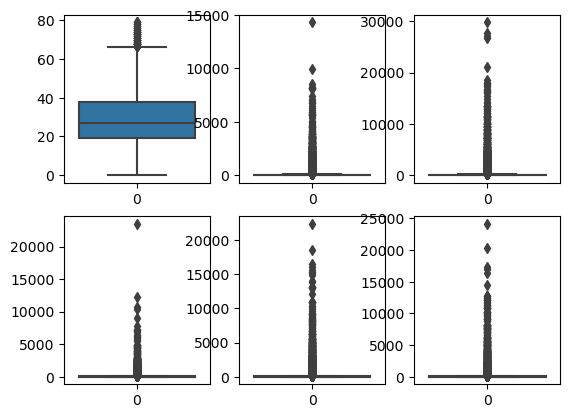

In [13]:
plt.figure(figsize=(18,10))
fig, ax = plt.subplots(2, 3) 
sns.boxplot(df_train["Age"], ax=ax[0,0])
sns.boxplot(df_train["RoomService"], ax=ax[0,1])
sns.boxplot(df_train["FoodCourt"], ax=ax[0,2])
sns.boxplot(df_train["ShoppingMall"], ax=ax[1,0])
sns.boxplot(df_train["Spa"], ax=ax[1,1])
sns.boxplot(df_train["VRDeck"], ax=ax[1,2])
plt.show()

In [14]:
df_train.duplicated().sum()

0

In [15]:
df_train.select_dtypes("object").columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

In [54]:
for x in df.select_dtypes(np.number).columns:    
    percentile25 = df[x].quantile(0.25)

    # Compute the 75th percentile value in `tenure`
    percentile75 = df[x].quantile(0.75)

    # Compute the interquartile range in `tenure`
    iqr = percentile75 - percentile25

    # Define the upper limit and lower limit for non-outlier values in `tenure`
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Lower limit:", lower_limit)
    print("Upper limit:", upper_limit)

    # Identify subset of data containing outliers in `tenure`
    outliers = df[(df[x] > upper_limit) | (df[x] < lower_limit)]

    # Count how many rows in the data contain outliers in `tenure`
    print(f'Number of rows in the data containing outliers in {x}:{len(outliers)}')

Lower limit: -9.5
Upper limit: 66.5
Number of rows in the data containing outliers in Age:77
Lower limit: -70.5
Upper limit: 117.5
Number of rows in the data containing outliers in RoomService:1861
Lower limit: -114.0
Upper limit: 190.0
Number of rows in the data containing outliers in FoodCourt:1823
Lower limit: -40.5
Upper limit: 67.5
Number of rows in the data containing outliers in ShoppingMall:1829
Lower limit: -88.5
Upper limit: 147.5
Number of rows in the data containing outliers in Spa:1788
Lower limit: -69.0
Upper limit: 115.0
Number of rows in the data containing outliers in VRDeck:1809


In [55]:
df.shape

(8693, 14)

In [56]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
cat_columns = df.select_dtypes(include="object").columns
num_columns = df.select_dtypes(include=np.number).columns

In [ ]:
cat_columns

In [ ]:
for col in cat_columns:
    print(f"{col}:{df[col].unique()}")

In [ ]:
for col in num_columns:
    print(f"{col}:{df[col].nunique()}")

In [ ]:
df.duplicated().sum()

***Cleaning***

In [ ]:
df.isna().sum()

In [ ]:
df_test.isna().sum()

In [ ]:
def mode_impute(data, cat_columns_data):
    for col in cat_columns_data:
        mode_val = data[col].mode()[0]
        data[col].fillna(mode_val, inplace=True)
    
def median_impute(data, num_columns_data):
    for col in num_columns_data:
        median_val = data[col].median()
        data[col].fillna(median_val, inplace=True)

In [ ]:
cat_columns

In [ ]:
num_columns

In [ ]:
mode_impute(df, cat_columns)
median_impute(df, num_columns)

In [ ]:
df.isna().sum()

In [ ]:
cat_columns_test = df_test.select_dtypes(include="object").columns
num_columns_test = df_test.select_dtypes(include=np.number).columns

In [ ]:
cat_columns_test

In [ ]:
mode_impute(df_test, cat_columns_test)
median_impute(df_test, num_columns_test)

In [ ]:
df_test.isna().sum()

In [ ]:
df.head()

In [ ]:
df.drop(columns=["PassengerId", "Name"], inplace=True)
df_test.drop(columns=["PassengerId", "Name"], inplace=True)

In [ ]:
df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb = LabelEncoder()

for col in df.columns:
    if df[col].dtype=="object" or df[col].dtype=="bool":
        df[col] = lb.fit_transform(df[col])
        
for col in df_test.columns:
    if df_test[col].dtype=="object" or df_test[col].dtype=="bool":
        df_test[col] = lb.fit_transform(df_test[col])

In [ ]:
df.head()

In [ ]:
df_test.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
X = df.drop(columns="Transported", axis=1)
y = df["Transported"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
tree1.fit(X_train, y_train)

In [ ]:
tree1.best_score_

In [ ]:
y_pred = tree1.predict(X_test)

In [ ]:
acc_score = accuracy_score(y_test, y_pred, normalize=True)

In [ ]:
acc_score

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
predictions = tree1.predict(df_test)

In [ ]:
predictions

In [ ]:
transformed_pred = predictions.astype(bool)
transformed_pred

In [ ]:
sample = pd.read_csv("spaceship-titanic/sample_submission.csv")
sample.head()

In [ ]:
submission_df = pd.DataFrame({"PassengerId":sample["PassengerId"], "Transported":transformed_pred})

In [ ]:
submission_df.head()

In [ ]:
accuracy_score(sample["Transported"], transformed_pred)

In [ ]:
submission_df.to_csv("spaceship_titanic_submission_3.csv", index=False)